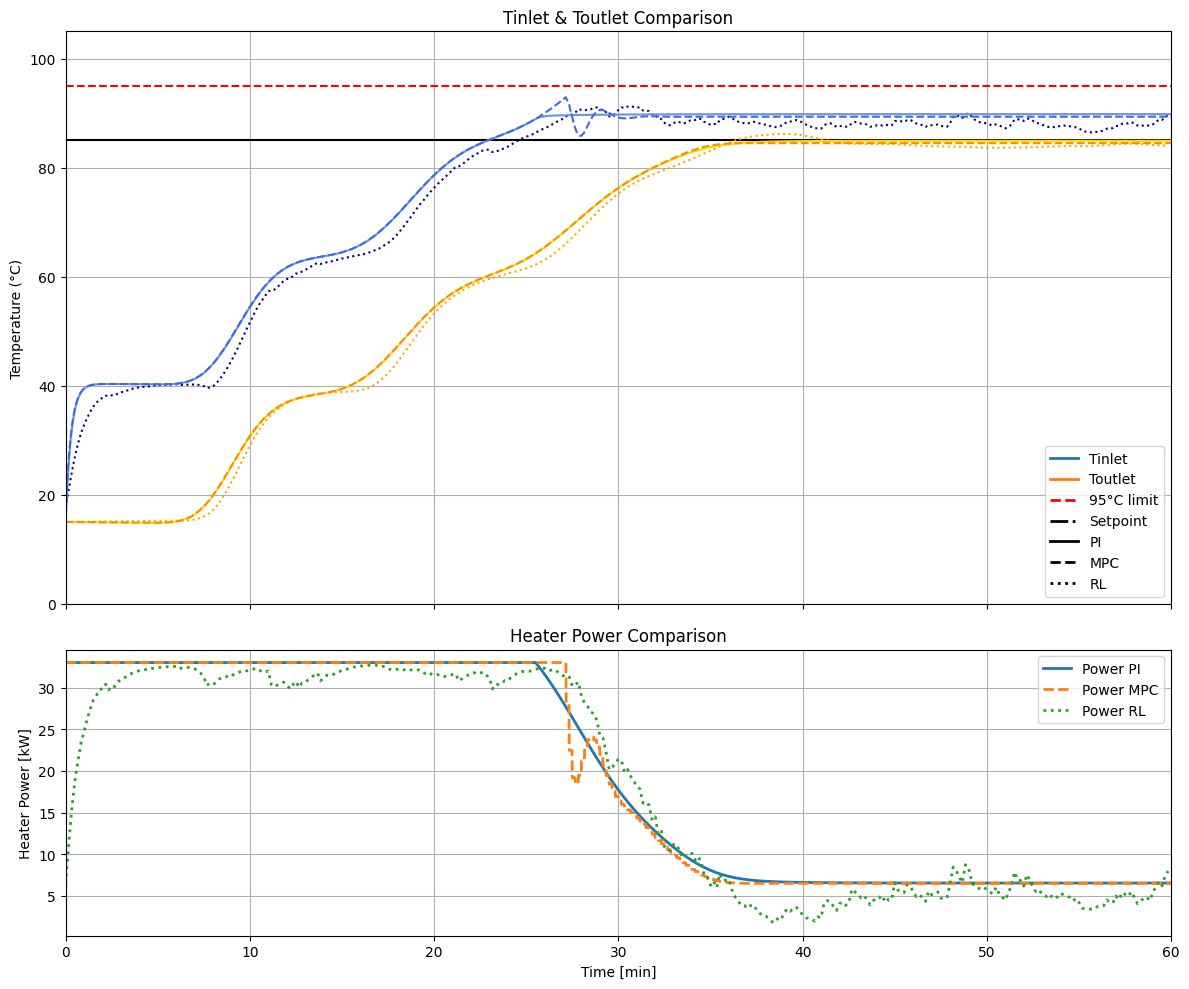

In [1]:
from compare_everything import plot_comparison_step,plot_comparison_ramp 

plot_comparison_step()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


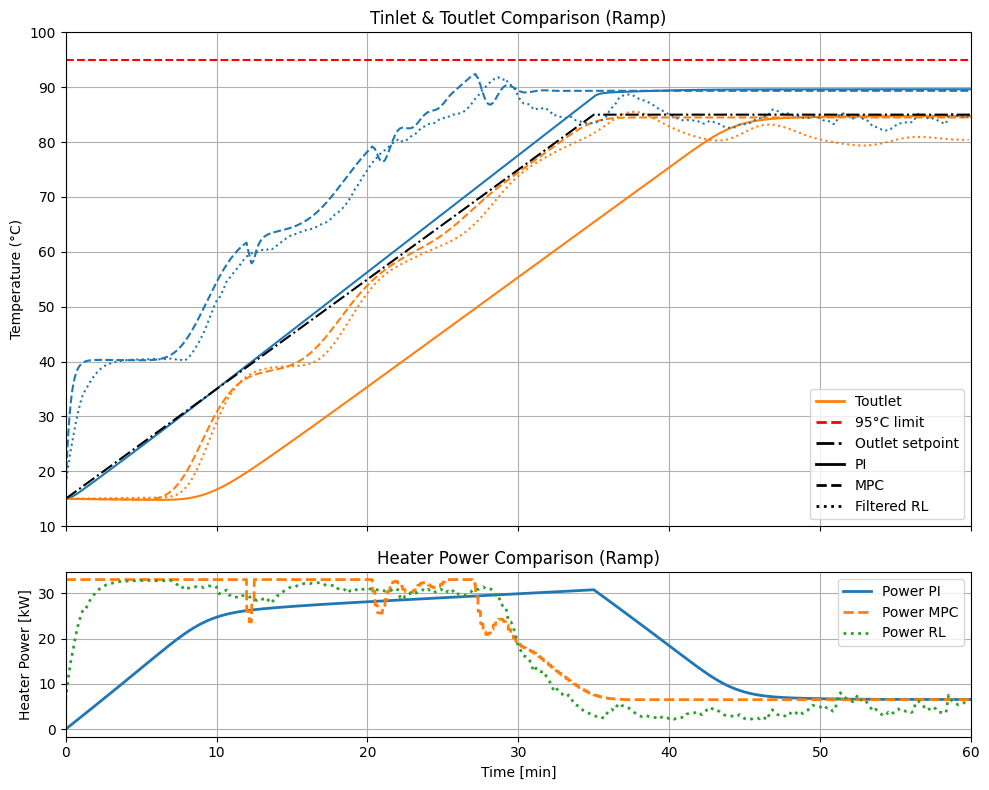

In [17]:

def plot_comparison_ramp():
    # Load the CSV files
    df_PI = pd.read_csv("results/ramp_PI_run_data.csv")
    df_MPC = pd.read_csv("results/MPC_run_data_ramp.csv")
    df_RL = pd.read_csv("results/ramp_RL_results.csv")

    # Define styles for each controller
    styles = {"PI": "-", "MPC": "--", "RL": ":"}
    controllers = {"PI": df_PI, "MPC": df_MPC, "RL": df_RL}

    colors = {
        "RL": {"Tinlet": "navy", "Toutlet": "orange"},
        "PI": {"Tinlet": "cornflowerblue", "Toutlet": "gold"},
        "MPC": {"Tinlet": "royalblue", "Toutlet": "darkorange"},
    }

    # --- Create subplots with height ratios ---
    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(10, 8), sharex=True, gridspec_kw={"height_ratios": [3, 1]}
    )

    # --- Subplot 1: Tinlet & Toutlet ---
    for name, df in controllers.items():
        ax1.plot(
            df["time_min"],
            df["Tinlet"],
            linestyle=styles[name],
            color="C0",
            label=f"Tinlet {name}",
        )
        ax1.plot(
            df["time_min"],
            df["Toutlet"],
            linestyle=styles[name],
            color="C1",
            label=f"Toutlet {name}",
        )

    # Limits and setpoint
    ax1.axhline(95, color="red", linestyle="--", label="95°C limit")
    ax1.plot(
        df_PI["time_min"],
        df_PI["Tset"],
        label="Toutlet setpoint",
        linestyle="-.",
        color="black",
    )

    ax1.set_ylabel("Temperature (°C)")
    ax1.set_title("Tinlet & Toutlet Comparison (Ramp)")
    ax1.grid(True)
    ax1.set_xlim([0, 60])
    ax1.set_ylim([10, 100])

    # Custom legend
    signal_lines = [
        # Line2D([0], [0], color="C0", lw=2, label="Tinlet"),
        Line2D([0], [0], color="C1", lw=2, label="Toutlet"),
        Line2D([0], [0], color="red", linestyle="--", lw=2, label="95°C limit"),
        Line2D([0], [0], color="black", linestyle="-.", lw=2, label="Outlet setpoint"),
    ]
    controller_lines = [
        Line2D([0], [0], color="black", linestyle="-", lw=2, label="PI"),
        Line2D([0], [0], color="black", linestyle="--", lw=2, label="MPC"),
        Line2D([0], [0], color="black", linestyle=":", lw=2, label="Filtered RL"),
    ]
    ax1.legend(handles=signal_lines + controller_lines, loc="best")

    # --- Subplot 2: Heater Power ---
    ax2.plot(
        df_PI["time_min"],
        df_PI["HeaterPower_kW"],
        color="C0",
        linestyle="-",
        lw=2,
        label="Power PI",
    )
    ax2.plot(
        df_MPC["time_min"],
        df_MPC["HeaterPower_kW"],
        color="C1",
        linestyle="--",
        lw=2,
        label="Power MPC",
    )
    ax2.plot(
        df_RL["time_min"],
        df_RL["HeaterPower_kW"],
        color="C2",
        linestyle=":",
        lw=2.0,
        label="Power RL",
    )

    ax2.set_xlabel("Time [min]")
    ax2.set_ylabel("Heater Power [kW]")
    ax2.set_title("Heater Power Comparison (Ramp)")
    ax2.grid(True)
    ax2.set_xlim([0, 60])
    ax2.legend(loc="best")

    plt.tight_layout()
    plt.show()

plot_comparison_ramp()


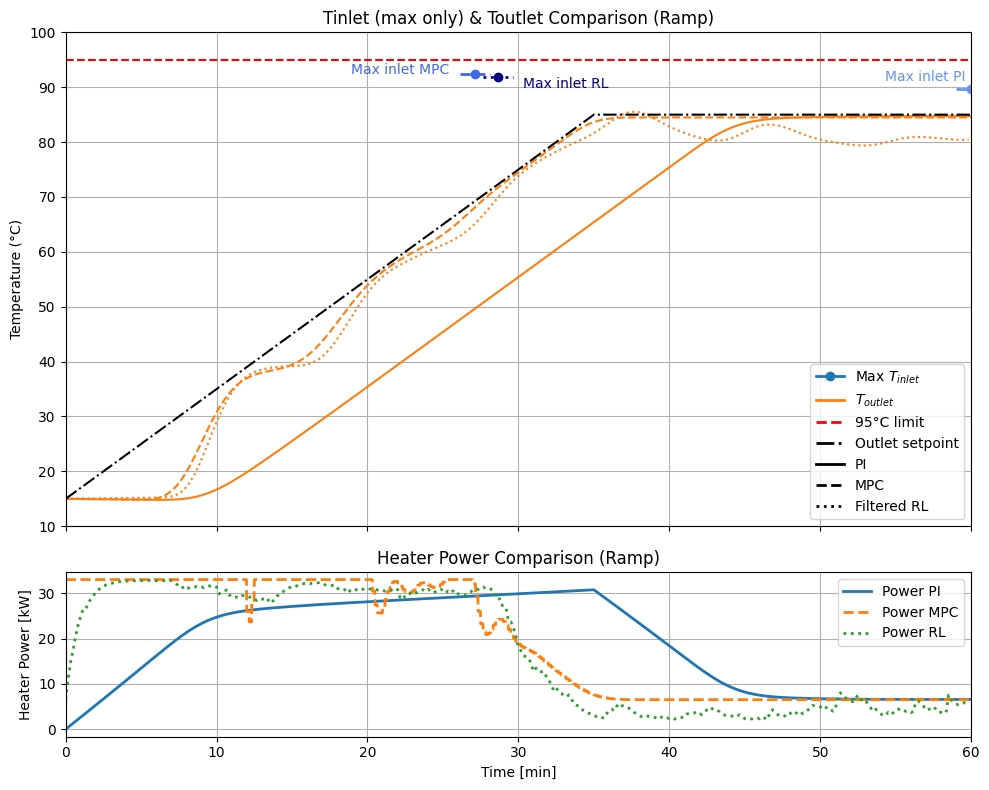

In [63]:
def plot_comparison_ramp():
    # Load the CSV files
    df_PI = pd.read_csv("results/ramp_PI_run_data.csv")
    df_MPC = pd.read_csv("results/MPC_run_data_ramp.csv")
    df_RL = pd.read_csv("results/ramp_RL_results.csv")

    styles = {"PI": "-", "MPC": "--", "RL": ":"}
    controllers = {"PI": df_PI, "MPC": df_MPC, "RL": df_RL}

    colors = {
        "RL": {"Tinlet": "navy", "Toutlet": "orange"},
        "PI": {"Tinlet": "cornflowerblue", "Toutlet": "gold"},
        "MPC": {"Tinlet": "royalblue", "Toutlet": "darkorange"},
    }
    
    offsets_x = {"PI": -3, "MPC": -5, "RL": 4.5}
    offsets_y = {"PI": 1.5, "MPC": 0.0, "RL": -2.0}


    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(10, 8), sharex=True, gridspec_kw={"height_ratios": [3, 1]}
    )

    for name, df in controllers.items():
        # --- Tinlet: plot plateau at max ---
        t_max_idx = df["Tinlet"].idxmax()
        t_max = df.loc[t_max_idx, "time_min"]
        Tinlet_max = df["Tinlet"].max()
        ax1.hlines(
            Tinlet_max,
            t_max - 1,
            t_max + 1,
            colors=colors[name]["Tinlet"],
            linestyles=styles[name],
            linewidth=2,
            label=f"Tinlet {name} (max)"
        )
        ax1.plot(t_max, Tinlet_max, "o", color=colors[name]["Tinlet"])
        
        # Add text directly on the plot (no marker)
        ax1.text(
            t_max + offsets_x[name], Tinlet_max + offsets_y[name],  # position slightly above plateau
            "Max inlet "+str(name),
            color=colors[name]["Tinlet"],
            fontsize=10,
            ha="center"
        )
    
        # --- Toutlet: full curve ---
        ax1.plot(
            df["time_min"],
            df["Toutlet"],
            linestyle=styles[name],
            color="C1",
            label=f"Toutlet {name}",
        )


    # Limits and setpoint
    ax1.axhline(95, color="red", linestyle="--", label="95°C limit")
    ax1.plot(
        df_PI["time_min"],
        df_PI["Tset"],
        label="Toutlet setpoint",
        linestyle="-.",
        color="black",
    )

    ax1.set_ylabel("Temperature (°C)")
    ax1.set_title("Tinlet (max only) & Toutlet Comparison (Ramp)")
    ax1.grid(True)
    ax1.set_xlim([0, 60])
    ax1.set_ylim([10, 100])

    legend_element = Line2D(
    [0], [0],
    color="C0",
    lw=2,
    linestyle="-",
    marker="o",
    label="Max $T_{inlet}$"
    )
    

    # Custom legend
    signal_lines = [
        # Line2D([0], [0], color="C0", lw=2, linestyle="o-",label="Max Tinlet"),
        Line2D([0], [0], color="C1", lw=2, label="$T_{outlet}$"),
        Line2D([0], [0], color="red", linestyle="--", lw=2, label="95°C limit"),
        Line2D([0], [0], color="black", linestyle="-.", lw=2, label="Outlet setpoint"),
    ]
    controller_lines = [
        Line2D([0], [0], color="black", linestyle="-", lw=2, label="PI"),
        Line2D([0], [0], color="black", linestyle="--", lw=2, label="MPC"),
        Line2D([0], [0], color="black", linestyle=":", lw=2, label="Filtered RL"),
    ]
    ax1.legend(handles= [legend_element]+ signal_lines + controller_lines , loc="best")
    # --- Subplot 2: Heater Power ---
    ax2.plot(
        df_PI["time_min"],
        df_PI["HeaterPower_kW"],
        color="C0",
        linestyle="-",
        lw=2,
        label="Power PI",
    )
    ax2.plot(
        df_MPC["time_min"],
        df_MPC["HeaterPower_kW"],
        color="C1",
        linestyle="--",
        lw=2,
        label="Power MPC",
    )
    ax2.plot(
        df_RL["time_min"],
        df_RL["HeaterPower_kW"],
        color="C2",
        linestyle=":",
        lw=2.0,
        label="Power RL",
    )

    ax2.set_xlabel("Time [min]")
    ax2.set_ylabel("Heater Power [kW]")
    ax2.set_title("Heater Power Comparison (Ramp)")
    ax2.grid(True)
    ax2.set_xlim([0, 60])
    ax2.legend(loc="best")

    plt.tight_layout()
    plt.savefig("summary.png")
    plt.show()

plot_comparison_ramp()